# Loading Data
#### We will simplify columns by providing col_names to pandas read_csv() function.

In [1]:
#import pandas
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
pima = pd.read_csv("dataset/diabetes.csv", header=1, names=col_names)

In [2]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


# Selecting Feature

Here, you need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [3]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

# Splitting Data

#### To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using the function train_test_split(). You need to pass 3 parameters: features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [4]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [5]:
X.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree
0,1,0,26.6,31,85,66,0.351
1,8,0,23.3,32,183,64,0.672
2,1,94,28.1,21,89,66,0.167
3,0,168,43.1,33,137,40,2.288
4,5,0,25.6,30,116,74,0.201


# Model Development and Prediction
#### First, import the Logistic Regression module

Then, fit your model on the train set using fit() and perform prediction on the test set using predict(). 

In [7]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[115,   8],
       [ 30,  39]], dtype=int64)

In [10]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

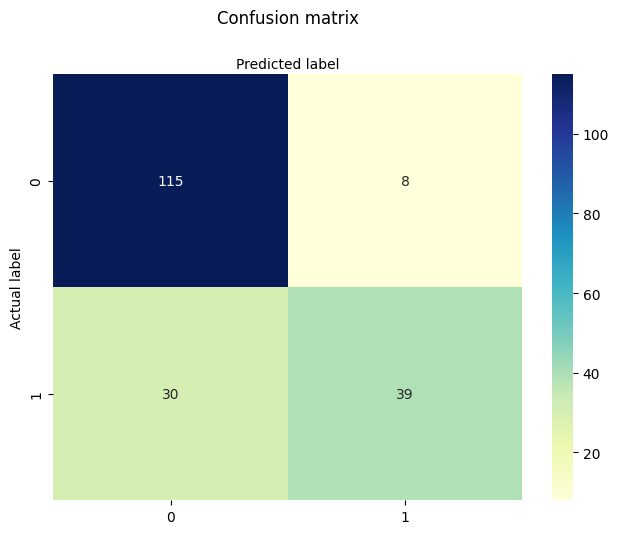

In [11]:
class_names = [0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [12]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.93      0.86       123
   with diabetes       0.83      0.57      0.67        69

        accuracy                           0.80       192
       macro avg       0.81      0.75      0.77       192
    weighted avg       0.81      0.80      0.79       192



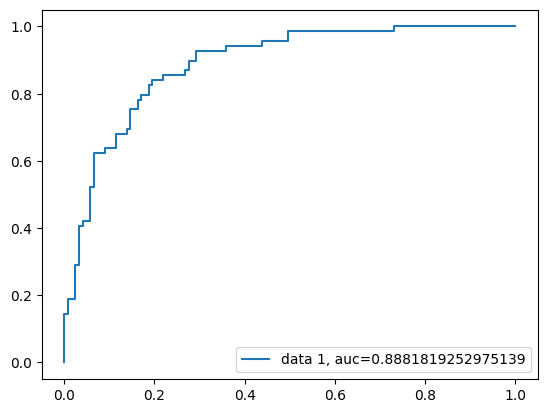

In [13]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()